In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/My Drive/Nguyen van Luong/course_work_2'
%ls

/content/drive/.shortcut-targets-by-id/1QAnu2eBLtCexX4Ioexq0cZyRWRIMaKPc/Nguyen van Luong/course_work_2
CW2.ipynb  data1/       data_split.npz  faces-embeddings.npz  Videos/
data/      data_split/  face_net/       test/


In [ ]:
"""
  Videos : chứa video gốc
  data : ảnh extract từ Videos
  data1 : ảnh face extract từ data
  data_split : chia dữ liệu train test từ data1
  face_net : chứa file save model facenet
  test : chứa ảnh test 
  
"""

'\n  data : ảnh extract từ video\n  data1 : ảnh face extract từ data\n  data_split : chia dữ liệu train test từ data1\n  face_net : chứa file save model facenet\n  test : chứa ảnh test \n  Videos : chứa video gốc\n'

In [ ]:
! pip install retina-face

In [4]:
from retinaface import RetinaFace

In [5]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir
import numpy as np
import os

from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt



In [ ]:
def extract_image_from_video():
    count = 0
    list_name = []
    for f in listdir('Videos'):
        list_name.append(f)
        cam = cv2.VideoCapture("Videos/" + f)

        directory = str(count)
        f_temp = f.split('.')[0]
        print('dic = ', directory)
        parent_dir = "./data/"

        # path = os.path.join(parent_dir, directory)
        path = os.path.join(parent_dir, f_temp)
        if not os.path.isdir(path):
            os.mkdir(path)
        currentframe = 0
        while (True):

            # reading from frame
            ret, frame = cam.read()

            if ret:  
                # if video is still left continue creating images
                name = './data/' + str(f_temp) + '/'+str(f_temp) +'('+ str(currentframe) +')' + '.jpg'

                print('Creating...' + name)

                # writing the extracted images
                cv2.imwrite(name, frame)

                # increasing counter so that it will
                # show how many frames are created
                currentframe += 1
            else:
                break

        # Release all space and windows once done
        cam.release()

        count += 1
    cv2.destroyAllWindows()
    return list_name


# list_name_temp = extract_image_from_video()
# print(list_name_temp)

In [ ]:
def extract_and_save_face():
  for i in listdir('data'):
    print("dang thang ", i)
    for j in listdir('./data/'+i):
      # print("den thằng thứ ", j)
      obj = RetinaFace.extract_faces(img_path = './data/'+i+"/"+j, align=False)
      if len(obj) != 0:
        # directory = str(count)
        parent_dir = "./data1/"
        path = os.path.join(parent_dir, i)
        name = path+"/"+j
        if not os.path.isdir(path):
            os.mkdir(path)
        
        cv2.imwrite(name,obj[0][:,:,::-1])

# extract_and_save_face()



In [ ]:
def train_test_split():
   for i in listdir('data1'):
    # print("dang thang ", i)
    
    path = './data1/'+i
    # print('path = ', path)
    num_files = len([f for f in os.listdir(path)if os.path.isfile(os.path.join(path, f))])
    print('all file', num_files)
    count = 0
    for j in listdir('./data1/'+i):
        if count <= (9*num_files)/10:
          parent_dir = "./data_split/train/"
          path = os.path.join(parent_dir, i)
          # print('path  = ', path)
          name = path+"/"+j

          if not os.path.isdir(path):
              os.mkdir(path)

          img_path = './data1/'+i+"/"+j
          obj = cv2.imread(img_path)
          cv2.imwrite(name,obj)
          
          # print('count file', count)
        # if count > (9*num_files)/10:
        else:
          parent_dir = "./data_split/test/"
          path = os.path.join(parent_dir, i)
          name = path+"/"+j

          if not os.path.isdir(path):
              os.mkdir(path)

          img_path = './data1/'+i+"/"+j
          obj = cv2.imread(img_path)
          cv2.imwrite(name,obj)

        count +=1

        

# train_test_split()



In [6]:
# kiểm tra sau khi split data thành train và test xem nó như thế nào
for i in listdir('data_split/train'):
    print("foler train ", i)
print('--------------')
for i in listdir('data_split/test'):
    print("dang thang ", i)

foler train  Việt Đức
foler train  Vân
foler train  Trường
foler train  Quân
foler train  Đức
foler train  Thắng
foler train  Tuấn
foler train  Linh
foler train  Tân
foler train  Xuân Anh
foler train  Hùng
foler train  Hiếu
foler train  Kiên
foler train  HĐức
--------------
dang thang  Việt Đức
dang thang  Vân
dang thang  Tân
dang thang  Xuân Anh
dang thang  Tuấn
dang thang  Đức
dang thang  Hiếu
dang thang  Hùng
dang thang  Trường
dang thang  Thắng
dang thang  Quân
dang thang  Kiên
dang thang  Linh
dang thang  HĐức


1 (323, 251, 3)
2 (322, 251, 3)
3 (323, 259, 3)
4 (328, 260, 3)
5 (314, 248, 3)
6 (329, 257, 3)
7 (326, 245, 3)
8 (328, 256, 3)
9 (322, 251, 3)
10 (328, 260, 3)
11 (320, 250, 3)
12 (322, 259, 3)
13 (315, 244, 3)
14 (320, 245, 3)
15 (314, 249, 3)


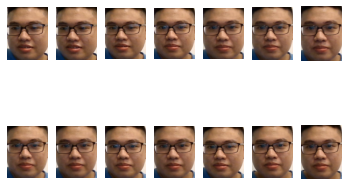

In [7]:
# hiển thị 14 thằng trong 1 folder train xem kết quả ra sao
folder = './data_split/train/Linh/'
i = 1
# enumerate files

for filename in listdir(folder):
  # path
  path = folder + filename
  # get face
  face = cv2.imread(path)[:,:,::-1]
  print(i, face.shape)
  # plot
  if i > 14:
    break
  plt.subplot(2, 7, i)
  plt.axis('off')
  plt.imshow(face)
  i += 1
  
plt.show()

In [8]:
def resize_img(img_path, required_size=(160, 160)):
  image = Image.open(img_path)
  image = image.convert('RGB')
  face = asarray(image)
  # print(face.shape)
  image = Image.fromarray(face)
  image = image.resize(required_size)
  face_array = asarray(image)
  return face_array 

In [11]:
# load images and extract faces for all images in a directory
# hàm này để load all image 1 người lên 1 cái list face 
def load_faces(directory):
  faces = list()
  for filename in listdir(directory):
    path = directory + filename
    face = resize_img(path)
    faces.append(face)
  return faces

# ví dụ thằng linh có 354 ảnh thì có list chứa 354 cái mặt
a = load_faces('./data_split/train/Linh/')
print(len(a))
print(a[0].shape)


354
(160, 160, 3)


In [12]:
from os.path import isdir
# load a dataset that contains one subdir for each class that in turn contains images
# hàm này sẽ gán nhãn cho mỗi ảnh load lên
def load_dataset(directory):
  X, y = list(), list()
  for subdir in listdir(directory):
    path = directory + subdir + '/'

    if not isdir(path):
      continue
    faces = load_faces(path)

    labels = [subdir for _ in range(len(faces))]
    print('label = ', labels[0])
    print('len = ', len(labels))

    X.extend(faces)
    y.extend(labels)

  return asarray(X), asarray(y)


directory = './data_split/train/'
faces, labels= load_dataset(directory)
print('shape X', faces[0].shape)
print('tong co tất cả ', len(faces))
print('len nhan ', len(labels))
print('haha', (faces[0].shape))

label =  Việt Đức
len =  609
label =  Vân
len =  444
label =  Trường
len =  414
label =  Quân
len =  931
label =  Đức
len =  574
label =  Thắng
len =  338
label =  Tuấn
len =  536
label =  Linh
len =  354
label =  Tân
len =  325
label =  Xuân Anh
len =  864
label =  Hùng
len =  715
label =  Hiếu
len =  518
label =  Kiên
len =  506
label =  HĐức
len =  195
shape X (160, 160, 3)
tong co tất cả  7323
len nhan  7323
haha (160, 160, 3)


In [ ]:
from numpy import savez_compressed

trainX, trainy = load_dataset('./data_split/train/')
print(trainX.shape, trainy.shape)
print('trainX[0]', trainX[0].shape)
# load test dataset
testX, testy = load_dataset('./data_split/test/')
print(testX.shape, testy.shape)
# save arrays to one file in compressed format
savez_compressed('data_split.npz', trainX, trainy, testX, testy)

label =  Việt Đức
len =  609
label =  Vân
len =  444
label =  Trường
len =  414
label =  Quân
len =  931
label =  Đức
len =  574
label =  Thắng
len =  338
label =  Tuấn
len =  536
label =  Linh
len =  354
label =  Tân
len =  325
label =  Xuân Anh
len =  864
label =  Hùng
len =  715
label =  Hiếu
len =  518
label =  Kiên
len =  506
label =  HĐức
len =  195
(7323, 160, 160, 3) (7323,)
trainX[0] (160, 160, 3)
label =  Việt Đức
len =  60
label =  Vân
len =  44
label =  Tân
len =  32
label =  Xuân Anh
len =  86
label =  Tuấn
len =  53
label =  Đức
len =  57
label =  Hiếu
len =  51
label =  Hùng
len =  71
label =  Trường
len =  41
label =  Thắng
len =  33
label =  Quân
len =  93
label =  Kiên
len =  50
label =  Linh
len =  35
label =  HĐức
len =  19
(725, 160, 160, 3) (725,)


In [24]:
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model

def get_embedding(model, face_pixels):
  # scale pixel values
  face_pixels = face_pixels.astype('float32')
  # print('face_pixel = ', type(face_pixels))
  # standardize pixel values across channels (global)
  mean, std = face_pixels.mean(), face_pixels.std()
  face_pixels = (face_pixels - mean) / std
  # transform face into one sample
  samples = expand_dims(face_pixels, axis=0)
  print('sample', samples.shape)
  print(type(samples))
  # make prediction to get embedding
  yhat = model.predict(samples)
  return yhat[0]




In [14]:
# load the face dataset
data = load('data_split.npz')
# lúc save data vào file data_split là nó có dạng trainx, trainy, testx, testy lên lúc đọc ra thì theo tứ tự như dưới
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (7323, 160, 160, 3) (7323,) (725, 160, 160, 3) (725,)


In [15]:
print(trainX[0].shape)

(160, 160, 3)


In [26]:
# load the facenet model
model = load_model('./face_net/model/facenet_keras.h5')
print('Loaded Model')
model.summary()

Loaded Model
Model: "inception_resnet_v1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv2d_1a_3x3 (Conv2D)         (None, 79, 79, 32)   864         ['input_1[0][0]']                
                                                                                                  
 Conv2d_1a_3x3_BatchNorm (Batch  (None, 79, 79, 32)  96          ['Conv2d_1a_3x3[0][0]']          
 Normalization)                                                                                   
                                                                   

In [25]:
# convert each face in the train set to an embedding
newTrainX = list()
for face_pixels in trainX:
  embedding = get_embedding(model, face_pixels)
  print('hihi',embedding.shape)
  newTrainX.append(embedding)  # cái này là embedding của từng mặt sẽ được lưu vào newTrain, newTrain là list các embedding face
newTrainX = asarray(newTrainX)
print(newTrainX.shape)
# convert each face in the test set to an embedding
newTestX = list()
for face_pixels in testX:
  embedding = get_embedding(model, face_pixels)
  newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)
# save arrays to one file in compressed format
savez_compressed('faces-embeddings.npz', newTrainX, trainy, newTestX, testy)  # lưu embedding face vào file

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
<class 'numpy.ndarray'>
hihi (128,)
sample (1, 160, 160, 3)
<class 'numpy.ndarray'>
hihi (128,)
sample (1, 160, 160, 3)
<class 'numpy.ndarray'>
hihi (128,)
sample (1, 160, 160, 3)
<class 'numpy.ndarray'>
hihi (128,)
sample (1, 160, 160, 3)
<class 'numpy.ndarray'>
hihi (128,)
sample (1, 160, 160, 3)
<class 'numpy.ndarray'>
hihi (128,)
sample (1, 160, 160, 3)
<class 'numpy.ndarray'>
hihi (128,)
sample (1, 160, 160, 3)
<class 'numpy.ndarray'>
hihi (128,)
sample (1, 160, 160, 3)
<class 'numpy.ndarray'>
hihi (128,)
sample (1, 160, 160, 3)
<class 'numpy.ndarray'>
hihi (128,)
sample (1, 160, 160, 3)
<class 'numpy.ndarray'>
hihi (128,)
sample (1, 160, 160, 3)
<class 'numpy.ndarray'>
hihi (128,)
sample (1, 160, 160, 3)
<class 'numpy.ndarray'>
hihi (128,)
sample (1, 160, 160, 3)
<class 'numpy.ndarray'>
hihi (128,)
sample (1, 160, 160, 3)
<class 'numpy.ndarray'>
hihi (128,)
sample (1, 160, 160, 3)
<class 'numpy.ndarray'>
hihi (128,)
sample 

In [ ]:
def test123():
  newTrainX = list()
  count = 0
  for face_pixels in trainX:
    print(type(face_pixels))
    print(face_pixels.shape)
    embedding = get_embedding(model, face_pixels)
    
    count+=1
    if count > 4:
      break
    newTrainX.append(embedding)  # cái này là embedding của từng mặt sẽ được lưu vào newTrain, newTrain là list các embedding face
  newTrainX = asarray(newTrainX)
  print(newTrainX.shape)

test123()

<class 'numpy.ndarray'>
(160, 160, 3)
<class 'numpy.ndarray'>
(160, 160, 3)
<class 'numpy.ndarray'>
(160, 160, 3)
<class 'numpy.ndarray'>
(160, 160, 3)
<class 'numpy.ndarray'>
(160, 160, 3)
(4, 128)


sau khi có embedding sẽ là đầu vào cho model svm phân loại

In [ ]:
# from numpy import load
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import Normalizer
# from sklearn.svm import SVC
# # load dataset
# data = load('faces-embeddings.npz')
# trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
# print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
# # normalize input vectors
# in_encoder = Normalizer(norm='l2')
# trainX = in_encoder.transform(trainX)
# testX = in_encoder.transform(testX)
# # label encode targets
# out_encoder = LabelEncoder()
# out_encoder.fit(trainy)
# trainy = out_encoder.transform(trainy)
# testy = out_encoder.transform(testy)
# # fit model
# model_svm = SVC(kernel='linear', probability=True)
# model_svm.fit(trainX, trainy)
# # predict
# yhat_train = model_svm.predict(trainX)
# yhat_test = model_svm.predict(testX)
# #
# score_train = accuracy_score(trainy, yhat_train)
# score_test = accuracy_score(testy, yhat_test)
# # summarize
# print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

hehe 725
725
selec =  621
class chọn để nhận diện 3
random face name  ['Kiên']
type sample <class 'numpy.ndarray'>
len sample 1
class dự đoán  [3]
class dự đoán  3
Predicted: Kiên (99.618)
Expected: Kiên


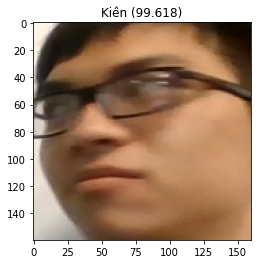

In [ ]:
# from random import choice
# from numpy import load
# from numpy import expand_dims
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import Normalizer
# from sklearn.svm import SVC
# from matplotlib import pyplot
# # load faces
# data = load('data_split.npz')
# testX_faces = data['arr_2']
# print('hehe',len(testX_faces))
# # load face embeddings
# data = load('faces-embeddings.npz')
# trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
# # normalize input vectors
# in_encoder = Normalizer(norm='l2')
# trainX = in_encoder.transform(trainX)
# testX = in_encoder.transform(testX)
# # label encode targets
# out_encoder = LabelEncoder()
# out_encoder.fit(trainy)
# trainy = out_encoder.transform(trainy)
# testy = out_encoder.transform(testy)
# # fit model
# model_svm = SVC(kernel='linear', probability=True)
# model_svm.fit(trainX, trainy)



# # test model on a random example from the test dataset
# selection = choice([i for i in range(testX.shape[0])])
# print(testX.shape[0])
# print('selec = ', selection)
# # selection = './data1/Linh/Linh(20).jpg'

# random_face_pixels = testX_faces[selection]
# random_face_emb = testX[selection]
# random_face_class = testy[selection]
# print('class chọn để nhận diện', random_face_class)

# #------------------------------------------
# random_face_name = out_encoder.inverse_transform([random_face_class])
# print('random face name ', random_face_name)
# #-----------------------------------------

# # prediction for the face
# samples = expand_dims(random_face_emb, axis=0)
# print('type sample', type(samples))
# print('len sample', len(samples))


# yhat_class = model_svm.predict(samples)
# print('class dự đoán ', yhat_class)
# yhat_prob = model_svm.predict_proba(samples)
# # get name


# class_index = yhat_class[0]

# print('class dự đoán ', class_index)

# class_probability = yhat_prob[0,class_index] * 100
# predict_names = out_encoder.inverse_transform(yhat_class)

# print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
# #----------------------------------------
# print('Expected: %s' % random_face_name[0])
# #----------------------------------------
# # plot for fun

# pyplot.imshow(random_face_pixels)
# title = '%s (%.3f)' % (predict_names[0], class_probability)
# pyplot.title(title)
# pyplot.show()

**Dùng Cosine đo độ tương đồng 2 vector**

Loaded Model
số face trong ảnh test =  9
Tân
unknow
Vân
Hùng
Đức
Thắng
unknow
Việt Đức
Vân


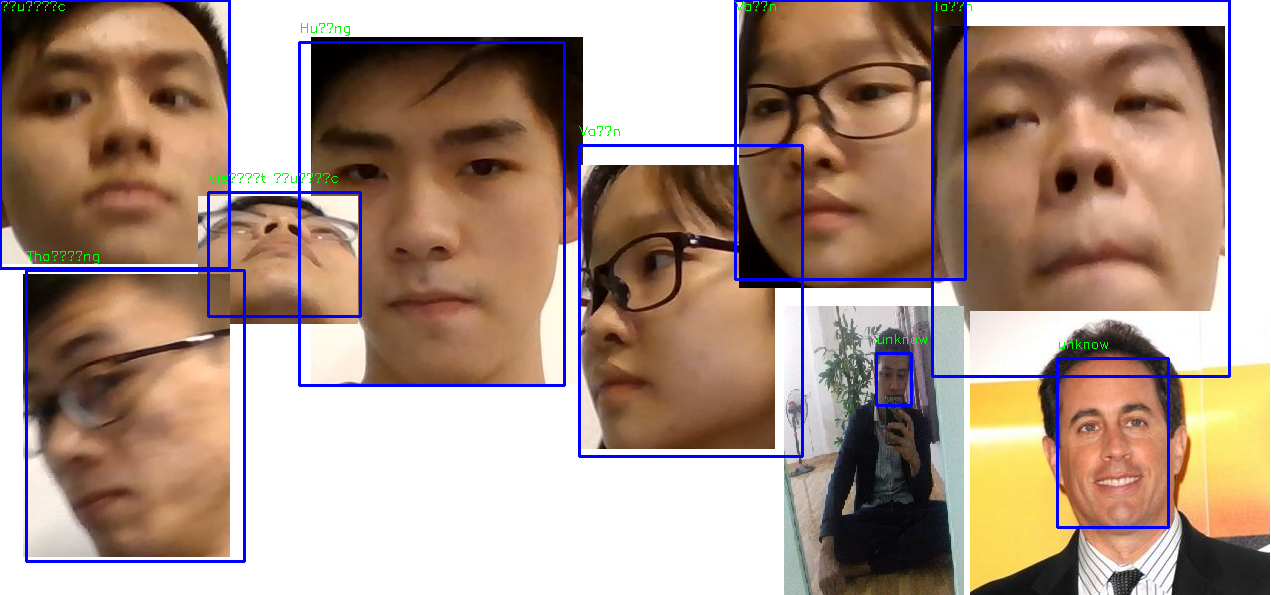

In [ ]:
from scipy.spatial.distance import cosine
from sklearn.preprocessing import Normalizer
def resize_img_2(img, required_size=(160, 160)):
  image = img
  face = asarray(image)
  image = Image.fromarray(face)
  image = image.resize(required_size)
  face_array = asarray(image)
  return face_array 

def check(model, img1, trainX):

  embedding_img1 = get_embedding(model, img1).reshape(-1,1)
  embedding_img1 = Normalizer(norm= 'l2').transform(embedding_img1)
  tmp = 100
  index = 0
  # print('len = ', len(trainX))
  for j in range(len(trainX)):
    dis  = cosine(embedding_img1, trainX[j])
    if dis < tmp:
      tmp = dis
      index = j
  if tmp > 0.35:
    print('unknow')
    return 'unknow'
  else:
    print(trainy[index])
    return trainy[index]

def recogninize_image(model, imagePath, trainX):
  """
    model : model facenet
    imagePath : path of image test
    trainX : all data trainX in faces-embeddings.npz

  """
  obj = RetinaFace.detect_faces(img_path=imagePath)
  print('số face trong ảnh test = ', len(obj))
  img = cv2.imread(imagePath)
  face = []
  for key in obj.keys():
    identity = obj[key]
    bounding_box = identity['facial_area']

    face = img[bounding_box[1] : bounding_box[3], bounding_box[0]: bounding_box[2]]
    # face = cv2.resize(face,(160,160))
    face = resize_img_2(face)
    id = check(model, face, trainX)
    
    cv2.rectangle(img, (bounding_box[2], bounding_box[3]), (bounding_box[0], bounding_box[1]), (255,0,0), 2)
    Y = bounding_box[1] -10 if bounding_box[1] - 10 > 10 else bounding_box[1] + 10
    cv2.putText(img, id, (bounding_box[0], Y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0,255,0), 1)

  return img

data = load('faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

model = load_model('./face_net/model/facenet_keras.h5')
print('Loaded Model')
img_path = './test/test1.jpg'
face = recogninize_image(model,img_path, trainX)
from google.colab.patches import cv2_imshow
cv2_imshow(face)
